<a href="https://colab.research.google.com/github/kevmanning/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/DS_132_Inference_For_Regression_Assignment_Kevin_Manning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unit 1, Sprint 3, Module 2

###Learning Objectives:
- Student can identify the appropriate hypotheses to test for a statistically significant relationship between two quantitative variables
- Student can conduct and interpret a t-test for the slope parameter
- Student can identify the appropriate parts of the output of a linear regression model and use them to build a confidence interval for the slope term.
- Student can make the connection between the t-test for a population mean and a t-test for a slope coefficient.
- Student can identify violations of the assumptions for linear regression

#Use the following information to answer assignment questions 1 - 10

###Is head size related to brain weight in healthy adult humans?

The Brainhead.csv dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

**We wish to determine if there is a linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

In [3]:
#Import the Brainhead.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


The two variables we are interested in - for now - are 

- Brain, the brain weight in g
- Head, the head size in cubic cm

1) What type of statistical test will we use to determine if there is a statistically significant association between head size and brain weight in the population?

Answer: ordinary least squares (ols) to see if there is a relationship between the variables in the sample; a t-test, statistical hypothesis test to infer the relationship between the variables in the population.

2) Write the null and alterative hypotheses you would use to test for a statistically significant association between head size and brain weight.

Answer: 

Ho: $\beta_1$ = 0<br>
Ha: $\beta_1 \neq$ 0

Null: The two variables are unrelated, therefore the slope = 0<br>
Alternative: There <em>**IS**<em> a relationship between the two variables.

3) Fit the OLS model and print all of the results.

In [8]:
### YOUR CODE HERE ###
from statsmodels.formula.api import ols 
import statsmodels.api as sm

model = ols('Brain ~ Head', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           5.96e-54
Time:                        01:59:15   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.0

4) Write the statistical model to predict brain weight from head size.

Answer: 

$\hat{Y} = 325.57 + .263 X$

5) Identify the standard error, t-statistic and p-value for the slope.

Answer: 

**Standard Error:** 0.013<br>
**t-statistic:** 20.409<br>
**p-value:** 0.00


6) Conduct your hypothesis test and determine if head size is statistically significantly associated with brain weight at the alpha = 0.05 level.

Answer: 

Because p = 0.00 < 0.05, we can reject the null hypothesis and accept the alternative hypothesis, which is that there is a realtionship between the variables of head size and brain weight in the population

7) Should you conduct a hypothesis test for the intercept term?  Why or why not?

Answer: In almost all cases, there is no need to do inference on the intercept. This is because the intercept parameter $\beta_o$ is the mean of the responses at x=0. since x would technically never = 0 in the population, there is no use make an inference on the intercept. 

8) What is a 95% confidence interval for your slope term?  Interpret this confidence interval in terms of how we expect brain weight to change when we change head size by one cubic cm.

Answer: We are 95% confident that the slope between head size and brain weight is between 0.238 and 0.289 grams per cubic cm of head size.

9) Plot the confidence limits on our slope and intercept terms with a shaded area around our regression line.

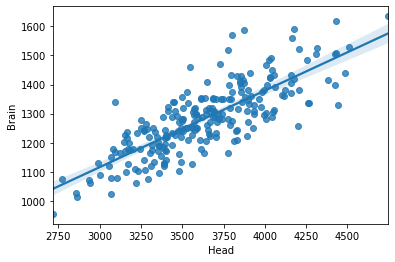

In [9]:
### YOUR CODE HERE ###

import seaborn as sns

ax = sns.regplot(x = 'Head', y = 'Brain', data= df, ci= 95)

10) Does it seem plausable that larger head size causes greater brain weight?  Or is it possible that something else causes differences in both of those factors?

Answer: It seems plausable that larger head size causes brain weight.<br> However, another factor, such as evolution development or type of animal (land, air, sea) could certainly factor into brain size.

#Use the following information to answer Questions 11 - 16

Import the Sleep.csv dataset from a URL and print the first few rows

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset. 


Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.



Data Dictionary:

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



In [10]:
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

sleep = pd.read_csv(data_url, skipinitialspace=True, header=0)

sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


11) Plot and describe the relationship between gestation time and time spent in dreaming sleep.

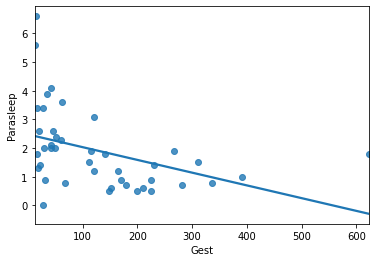

In [11]:
### YOUR CODE HERE ###

ax = sns.regplot(x= 'Gest', y= 'Parasleep', data= sleep, ci= None)

Answer: There are some outliers, but there **does not** look to be a linear realtionship between gestation time and dreaming sleep time.

12) Create a new variable with the log of gestational time.

In [12]:
### YOUR CODE HERE ###
sleep['log_gest'] = np.log(sleep['Gest'])
sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,log_gest
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,3.737670
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,6.436150
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,5.192957
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1,3.555348
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,5.971262


13) Plot and describe the relationship of the log of gestational time and dreaming sleep

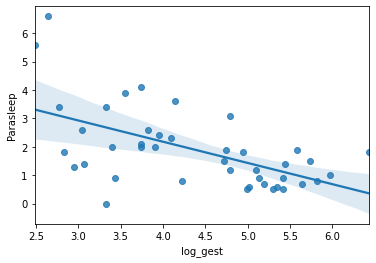

In [13]:
### YOUR CODE HERE ###

ax = sns.regplot(x= 'log_gest', y= 'Parasleep', data= sleep, ci= 95)

Answer: it looks as if there is much more of a linear relationship between the log of the gestation time and dreaming sleep time.

14) Model the relationship of the log of gestation time and dreaming sleep using ols.

In [15]:
### YOUR CODE HERE ###

model= ols('Parasleep ~ log_gest', data= sleep).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     19.49
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           7.48e-05
Time:                        02:45:17   Log-Likelihood:                -64.550
No. Observations:                  42   AIC:                             133.1
Df Residuals:                      40   BIC:                             136.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1762      0.763      6.782      0.0

15) Is the log of gestational time statistically significantly associated with time spent in dreaming sleep at the alpha = 0.05 level?

Answer: since p = 0.0 < 0.05, the null hypothesis is rejected and we can accept the alternative hypothesis that there is a linear relationship between the log values of the gestational time and dreaming time during sleep.

16) Predict the amount of dreaming sleep that a mammal that gestates her young for 262 days gets.

In [21]:
model.params

Intercept    5.176249
log_gest    -0.748942
dtype: float64

In [23]:
### YOUR CODE HERE ###

# specify interpertation number
x= 262

# take the natural log of x

log_x = np.log(x)

# extract the intercept and slope
intercept= model.params[0]
slope= model.params[1]

predict = intercept + slope * log_x

print('ln 262:', log_x)
print('Predicted dreaming sleep:', predict)

ln 262: 5.568344503761097
Predicted dreaming sleep: 1.0058836239175841


Answer: We therefore predict an animal with a gestation period of **262 days** would get **1 hour** of dreaming sleep each night

#Portfolion Project Assignment

Write your blog post.  Complete everything - code, visualizations, etc.